## MACHINE LEARNING PROJECT : BANK LOAN PREDICTION

By : Zied Ferah, Noura Hessini

In [121]:
## Importing linear algebra and pandas for data processing

import numpy as np
import pandas as pd

In [122]:
## We will encounter some warnings which will tell us that we are replacing elements on the original copy of df. those codes will supress them
# and make the notebook "cleaner"

import warnings
warnings.filterwarnings("ignore")

In [123]:
### Importing the data

df = pd.read_csv('loan_data_set.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
print('Our data have',df.shape[0],'rows &',df.shape[1],'columns')

Our data have 614 rows & 13 columns


#### <center> Before everything, lets try to understand the data and the objective 

Our data consists of 13 vairables : 

Loan_ID : The reference number of the loan

Gender : Male or Female

Married : is the person Married or not

Dependents : Number of family members

ApplicantIncome : Income in $

CoapplicantINcome : Some applicants can reply on co-applicants and this will show their income

LoanAmount : The amount borrow in $000

Loan_Amount_Term : Number of months before maturity 

Credit history : Credit history meets guidelines

Property_Ara : Location type

Loan status : this will be our Y . Do we approve the loan Y/N

In [125]:
### Lets check the type

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [126]:
### Lets check some statistics

df.describe(include='float64')



,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,1621.245798,146.412162,342.00000,0.842199
std,2926.248369,85.587325,65.12041,0.364878
min,0.000000,9.000000,12.00000,0.000000
25%,0.000000,100.000000,360.00000,1.000000
50%,1188.500000,128.000000,360.00000,1.000000
75%,2297.250000,168.000000,360.00000,1.000000
max,41667.000000,700.000000,480.00000,1.000000


In [127]:
### As you can see in the count we have some missing values in LoanAmount , Loan_Amount_Term & Credit history

In [128]:
## We know that we have object we can check the categorical variables's statistics

df_cat = df.describe(include='object')

df_cat


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002682,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [129]:
### We also have some missing values in all of them excluding Education, Loan_ID , property_Area.

In [130]:
## Check unique values of the categorical variables , excluding the ID

for uniquee in df.columns:
    if df[uniquee].dtype == 'object':
        if not uniquee == 'Loan_ID':
            print('unique values for',uniquee,':',df[uniquee].unique())
            print('')


## We have some hot encoding to do here, at which we will come back later on

unique values for Gender : ['Male' 'Female' nan]

unique values for Married : ['No' 'Yes' nan]

unique values for Dependents : ['0' '1' '2' '3+' nan]

unique values for Education : ['Graduate' 'Not Graduate']

unique values for Self_Employed : ['No' 'Yes' nan]

unique values for Property_Area : ['Urban' 'Rural' 'Semiurban']

unique values for Loan_Status : ['Y' 'N']



## Data cleaning & preprocessing

as we have 2 indexes, let's remove the loan ID and use the pd index as a reference instead.


In [131]:
df = df.drop('Loan_ID', axis = 1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### First of all lets encode some labels 

This is just to encode , we will not use onehot encoding until later on !

In [132]:

### Changing the features

df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True) ### In here just replacing the 3+ by 3 so we can convert it to int later on
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})


### Also changing the target 

df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})


In [133]:
### Let's refresh our dataset

for uniquee in df.columns:
        if not uniquee == 'ApplicantIncome' and not uniquee == 'CoapplicantIncome' and not uniquee == 'LoanAmount':
            print('unique values for',uniquee,':',df[uniquee].unique())
            print('')


unique values for Gender : [ 1.  0. nan]

unique values for Married : [ 0.  1. nan]

unique values for Dependents : ['0' '1' '2' 3 nan]

unique values for Education : [1 0]

unique values for Self_Employed : [ 0.  1. nan]

unique values for Loan_Amount_Term : [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]

unique values for Credit_History : [ 1.  0. nan]

unique values for Property_Area : [2 3 1]

unique values for Loan_Status : [1 0]



### Now we will go through the nan values and handling them



In [134]:
df.isnull().sum()



Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Since our features are not balanced and usually a category is more dominant than the other , we decided to do the following :


1- We will imputate the categorical variables with the mode (we replace nan values with the most frequent category)


2- We will imputate the continuous variables with interpolation (using the local mean) : The reason behind this is when we plot the contnious variable, it will follow line trends, so to respect the trend we better fill with the local mean.


3- For Credit_History, having a lot of nan values, we cannot delete the column and mode imputation generally should be made when your nan values represent 5% of the variable. So we can refer to logic in this case : Most banks don't even look at your request if you don't meet the guidelines, so it is better to make them all = 1 (meet guidelines) , in this case imputing with the mode makes sense

In [135]:


### Imputating the categorical data with the mode

imputate_cat =['Gender','Married','Dependents','Self_Employed','Credit_History']

for a in imputate_cat:
    df[a] = df[a].fillna(df[a].mode()[0])


### Imputating the continuous data with the local mean 

df.Loan_Amount_Term = df.Loan_Amount_Term.interpolate()

df.LoanAmount = df.LoanAmount.interpolate()

### Cannot interploate the 1st value so for the loan amount case we will just drop it

df = df.drop(labels=0, axis=0)


In [136]:
df.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Now we will go through each variable and convert them to integers



In [137]:
df.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Any categorical data will be converted to int8 (the lowest memory possible), while all the continuous will be converted to int32 (to also conserve memory unlike int64)

In [138]:

int_64_list = ['Loan_Amount_Term','ApplicantIncome','CoapplicantIncome','LoanAmount']

for integer in df.columns:
    if not integer in int_64_list: 
        df[integer] = df[integer].astype('int8')
    else: df[integer] = df[integer].astype('int32')

df.dtypes
    

Gender                int8
Married               int8
Dependents            int8
Education             int8
Self_Employed         int8
ApplicantIncome      int32
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History        int8
Property_Area         int8
Loan_Status           int8
dtype: object

In [139]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508,128,360,1,3,0
2,1,1,0,1,1,3000,0,66,360,1,2,1
3,1,1,0,0,0,2583,2358,120,360,1,2,1
4,1,0,0,1,0,6000,0,141,360,1,2,1
5,1,1,2,1,1,5417,4196,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0,71,360,1,3,1
610,1,1,3,1,0,4106,0,40,180,1,3,1
611,1,1,1,1,0,8072,240,253,360,1,2,1
612,1,1,2,1,0,7583,0,187,360,1,2,1


### Checking noisy data

Since we have no "objects" and our conversion to "int" was a success , it means that we do not have special characters. However we have to check for illogical values (for example a negative price)

In [140]:
## Now we will check for noisy data

## Applicant income

inc1 = df.ApplicantIncome <= 0
print('there is',df.ApplicantIncome[inc1].count(),'noisy values in applicant income') 

##Coapplicant income

inc2 = df.CoapplicantIncome <= 0
print('there is',df.CoapplicantIncome[inc2].count(),'noisy values in CO applicant income')

##Loan Amount

inc3 = df.LoanAmount <= 0
print('there is',df.LoanAmount[inc3].count(),'noisy values in Loan amount')

##Loan Term

inc4 = df.Loan_Amount_Term <= 0
print('there is',df.Loan_Amount_Term[inc4].count(),'noisy values in Loan amount term')

there is 0 noisy values in applicant income
there is 272 noisy values in CO applicant income
there is 0 noisy values in Loan amount
there is 0 noisy values in Loan amount term


#### Co applicant income

This variable has 272 zero's (or nagative values) , which is almost 75% of our data, we decided to just remove it as well

In [141]:
df = df.drop(columns=['CoapplicantIncome'], axis= 1)

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,128,360,1,3,0
2,1,1,0,1,1,3000,66,360,1,2,1
3,1,1,0,0,0,2583,120,360,1,2,1
4,1,0,0,1,0,6000,141,360,1,2,1
5,1,1,2,1,1,5417,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,71,360,1,3,1
610,1,1,3,1,0,4106,40,180,1,3,1
611,1,1,1,1,0,8072,253,360,1,2,1
612,1,1,2,1,0,7583,187,360,1,2,1


#### Double checking unique values for the categorical variables 

In [142]:

for xx in df.columns:
    if df[xx].dtype == 'int8':
            print('unique values for',xx,':',df[xx].unique())
            print('')

unique values for Gender : [1 0]

unique values for Married : [1 0]

unique values for Dependents : [1 0 2 3]

unique values for Education : [1 0]

unique values for Self_Employed : [0 1]

unique values for Credit_History : [1 0]

unique values for Property_Area : [3 2 1]

unique values for Loan_Status : [0 1]



#### Last but not least, we will check the outliers in the continuous variables

<Figure size 1080x576 with 0 Axes>

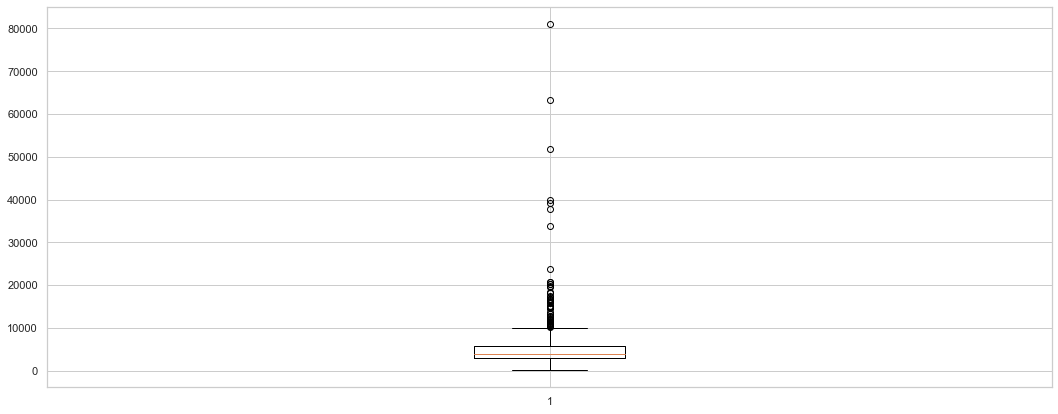

In [143]:
import matplotlib.pyplot as plt

zied = plt.figure()
plt.figure(figsize=(18,7))
plt.boxplot([df.ApplicantIncome])
plt.savefig("plots.pdf")
plt.show()


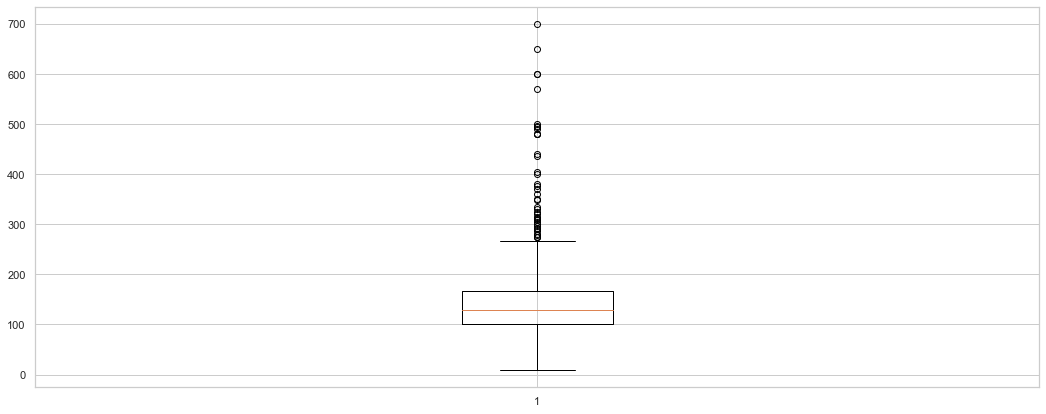

In [144]:
plt.figure(figsize=(18,7))
plt.boxplot([df.LoanAmount])
plt.show()

#### No explanation to the outliers and we have no logical reason to remove them

#### for data binning , we don't have to do any binning on the continuous data , otherwise we will risk losing information

#### for data normalization , we don't have to normalize either because we do will not run any regression

In [145]:
## Last touches (resetting the index )



df.reset_index(inplace= True)

df = df.drop(['index'],axis = 1)

df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,1,0,4583,128,360,1,3,0
1,1,1,0,1,1,3000,66,360,1,2,1
2,1,1,0,0,0,2583,120,360,1,2,1
3,1,0,0,1,0,6000,141,360,1,2,1
4,1,1,2,1,1,5417,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
608,0,0,0,1,0,2900,71,360,1,3,1
609,1,1,3,1,0,4106,40,180,1,3,1
610,1,1,1,1,0,8072,253,360,1,2,1
611,1,1,2,1,0,7583,187,360,1,2,1


## Data exploration

Lets explore our data and extract some intel or new information


In [146]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [147]:
## Barchart function to make things easier

def barchart(feature, x):
    df1 = df.groupby('Loan_Status')[feature].value_counts().unstack()
    df1.plot(stacked = x, kind = 'bar')

### Lets see The relationship of Loan status with the gender

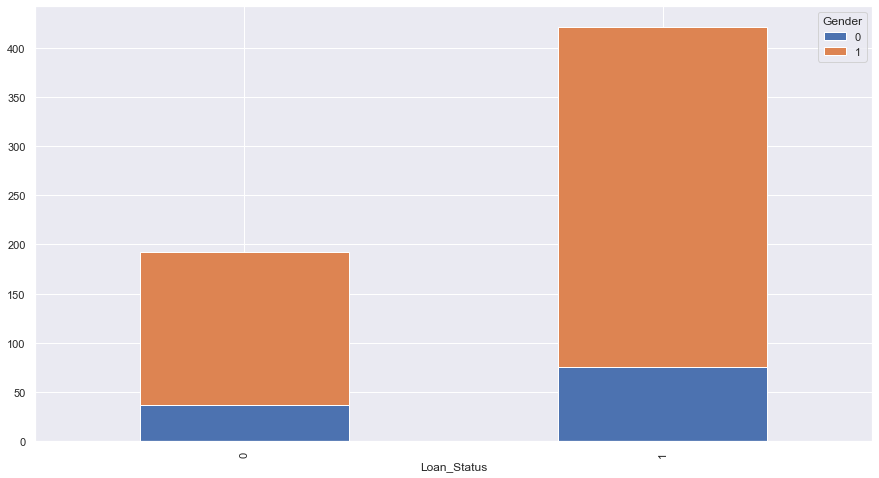

In [148]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
barchart('Gender',True)

In [149]:
df.Gender.value_counts()

1    501
0    112
Name: Gender, dtype: int64

The majority of males are being accepted and also denied by banks (We can confim this if the cateogries are balanced, but not in our case so through this graph we can't extract accurate informaltion)

### Lets check the relationship between Loan status and credit history

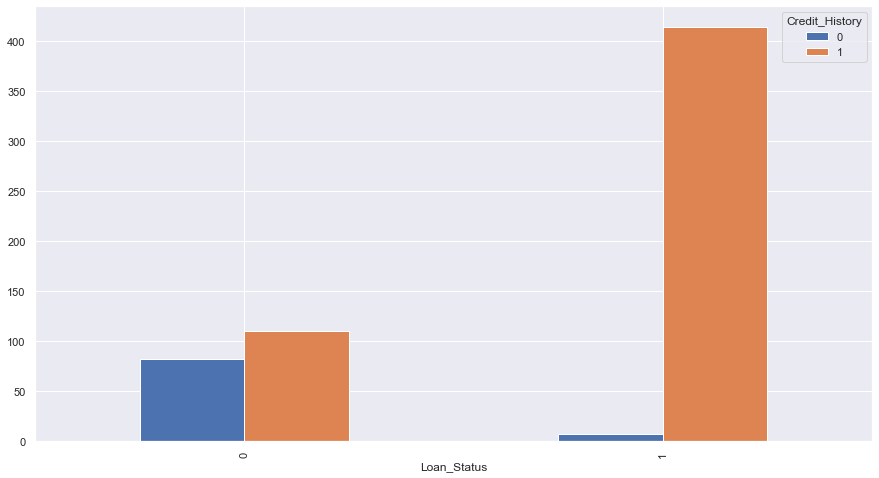

In [150]:
barchart('Credit_History',False)

Almost all people who got accepted for a loan have respected the credit guidelines

Most of the people who did not respect the guidelines got rejected , also we can see some people that were not accepted even though they respect the guidelines (maybe they missed something else)

### Checking the relationship between graduation and Loan status

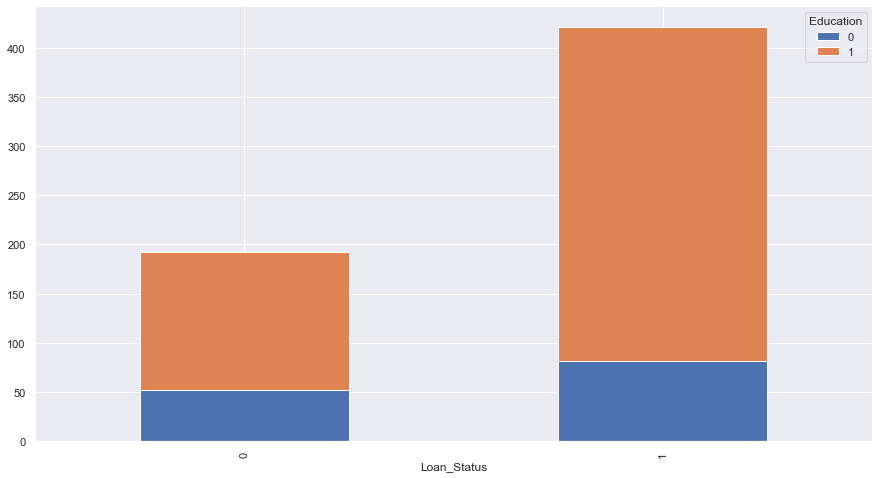

In [151]:
barchart('Education',True)

Graduate people tend to be accepted more than the people who are not graduated

### Checking the relationship between graduation and dependents

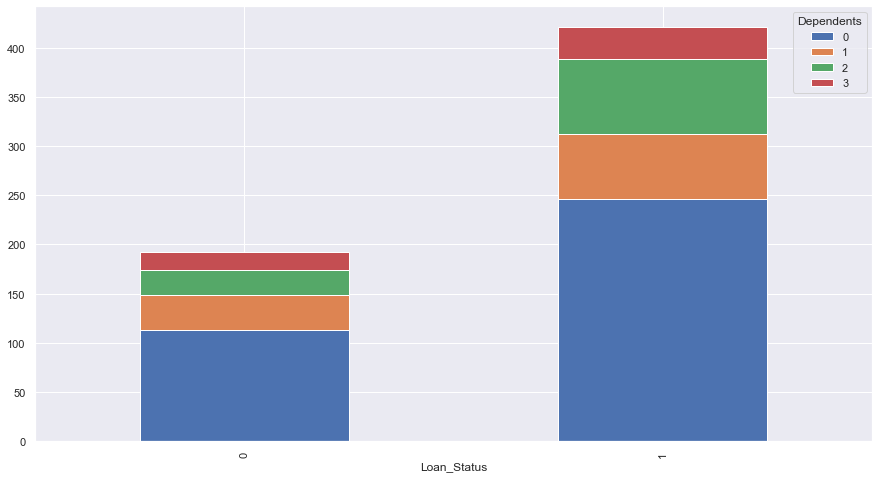

In [152]:
barchart('Dependents',True)

This won't tell us much ! because the proportions are the same (just like gender)

### Loan Amount vs Loan status ?

[]

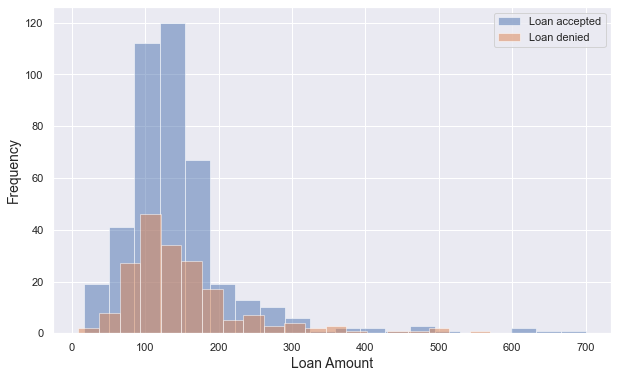

In [153]:

mask_yes = df.Loan_Status == 1
mask_no = df.Loan_Status == 0

df_yes = df[mask_yes]
df_no = df[mask_no]

plt.figure(figsize=(10,6))
plt.hist(df_yes['LoanAmount'], bins=20, alpha=0.5, label="Loan accepted")
plt.hist(df_no['LoanAmount'], bins=20, alpha=0.5, label="Loan denied")
plt.xlabel("Loan Amount", size=14)
plt.ylabel("Frequency", size=14)
plt.legend(loc='upper right')
plt.plot()


1- Majority of people who request medium loans are being accepted 

2- Majority of people who request medium loans are also being denied

3- The loan amount is not a strong indicator of the loan status , But from this graph we can safely say that the bank deals only with medium loan amounts

## Checking the distribution of the income and the loan amount


In [154]:
### If we are going to compare 2 continuous variables, we have to normalize them

### But we will normalize only for the sake of showing the curves, no need to integrate the changes in the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df1 = df.copy()

df1[['ApplicantIncome','LoanAmount']] = scaler.fit_transform(df1[['ApplicantIncome','LoanAmount']])



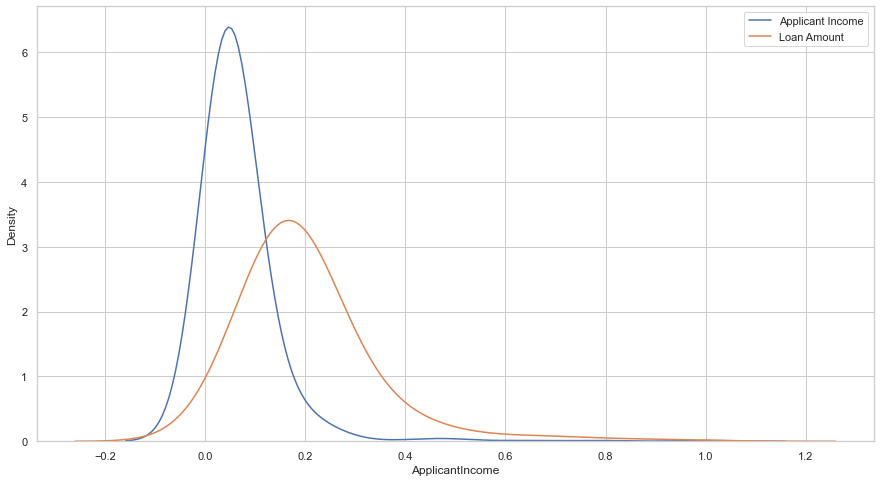

In [155]:
sns.set_style('whitegrid')
sns.kdeplot(df1.ApplicantIncome, bw=0.7, Label = "Applicant Income")
sns.kdeplot(df1.LoanAmount, bw=0.7, Label = "Loan Amount")
plt.legend()
plt.show()

Around 33% of high earners (people with high income) tend to borrow Loans in medium amounts

### Feature selection ( Chi square Correlation matrix)

<AxesSubplot:>

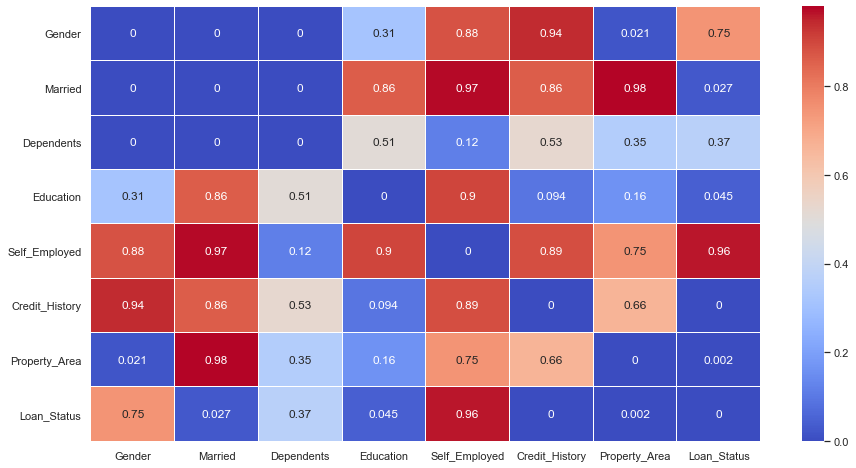

In [156]:
import os 
from sklearn.feature_selection import chi2
from scipy import stats
import matplotlib.pylab as plt

# 1- we will drop all continuous variable
df_c = df.drop(['ApplicantIncome','LoanAmount','Loan_Amount_Term'], axis = 1)
df_c

column_names=df_c.columns

chisqmatrix=pd.DataFrame(df_c,columns=column_names,index=column_names)

outercnt=0
innercnt=0
for icol in column_names:
    
    for jcol in column_names:
        
       mycrosstab=pd.crosstab(df_c[icol],df_c[jcol])
       # calculating the p calue
       stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
       chisqmatrix.iloc[outercnt,innercnt]=round(p,3)        # rounding to 0 for very small variables

       cntexpected=expected[expected<5].size
       perexpected=((expected.size-cntexpected)/expected.size)*100
      
       #print (icol)
       #print (jcol)
       if perexpected<20:
            chisqmatrix.iloc[outercnt,innercnt]=2
       #print (perexpected) 
       if icol==jcol:
           chisqmatrix.iloc[outercnt,innercnt]=0.00
       #print (expected) 
       innercnt=innercnt+1
    #print (outercnt) 
    outercnt=outercnt+1
    innercnt=0
    


sns.heatmap(chisqmatrix.astype(np.float64), annot=True,linewidths=0.1, 
            cmap='coolwarm')


(ignoring the diagonals) Loan_Status have a storng correlation with Property Area & Credit history 

Married and dependents have a strong correlation as well (this is logic as most of people have a family when they are married) (so is married and gender)


In contrast we have some poor correlations for example property_area and married / propery_area and credit history


Unlike the correlation matrix, in here we want to see the values that are close to 0 (because we are talking about the feature significance hence the p value)

## Data formatting

#### Lets split the data into X and y

In [157]:
y = df['Loan_Status'].copy()
X = df.drop(['Loan_Status'],axis = 1).copy()

#### We have to encode our X  

1- we check for what features should be encoded (pretty much any feature that differ from 0 and 1)

In [158]:

features_to_be_encoded = []
for xx in X.columns:
    if len(X[xx].unique()) != 2:
        if xx != 'ApplicantIncome' and xx != 'Loan_Amount_Term' and xx!='LoanAmount' :
            features_to_be_encoded.append(xx)

features_to_be_encoded



['Dependents', 'Property_Area']

2- We have our list of features to be encoded, lets integrate that list in a New X called X_e (X encoded)

In [159]:
X_e = pd.get_dummies(X, columns= features_to_be_encoded)

X_e.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_1,Property_Area_2,Property_Area_3
0,1,1,1,0,4583,128,360,1,0,1,0,0,0,0,1
1,1,1,1,1,3000,66,360,1,1,0,0,0,0,1,0
2,1,1,0,0,2583,120,360,1,1,0,0,0,0,1,0
3,1,0,1,0,6000,141,360,1,1,0,0,0,0,1,0
4,1,1,1,1,5417,267,360,1,0,0,1,0,0,1,0


# Decision Tree

We will try to run and improve our decision tree model.

First we will run a simple decision tree and from the model metrics given, we will see if we can tweak or improve our tree if necessary

## Building our initial decision tree (simple version)

#### Data splitting

In [160]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_e, y, test_size = 0.2 , random_state= 42)

#### Running a simple decision tree

<function matplotlib.pyplot.show(close=None, block=None)>

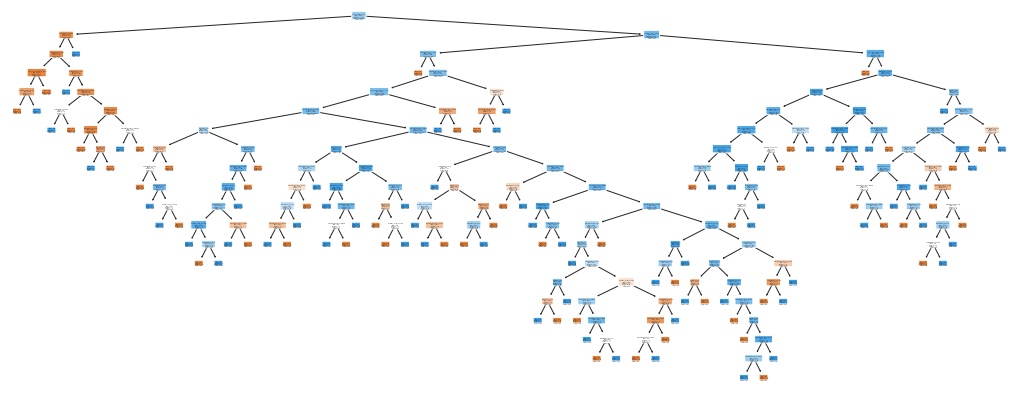

In [161]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt_simple = DecisionTreeClassifier(random_state=42)
dt_simple.fit(X_train, y_train)

### Plotting the tree

plt.figure(figsize=(18,7))
plot_tree(dt_simple, feature_names=X_e.columns, class_names = ['No','Yes'], filled = True, rounded =  True)

plt.show

As we see we have a huge decision tree, we can right now say there is an overfit, but let's check the matrix and the auc curve and get the interpretation in numbers

#### Plotting a confusion matrix and calculating the accuracy score


1- Plotting the matrix of the training set

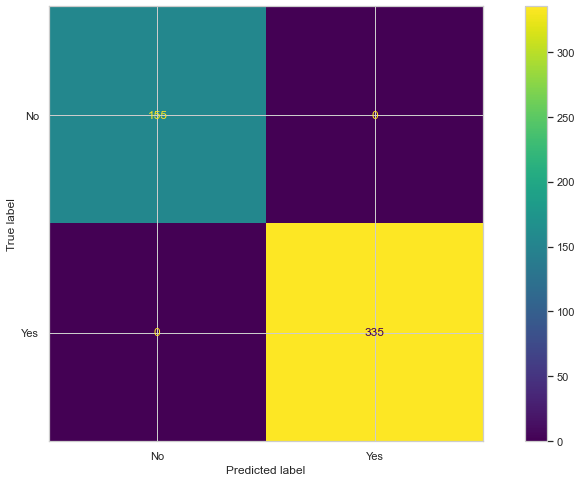

In [162]:


plot_confusion_matrix(dt_simple, X_train, y_train, display_labels=["No","Yes"])  





2- Plotting the accurarcy matrix of the test set

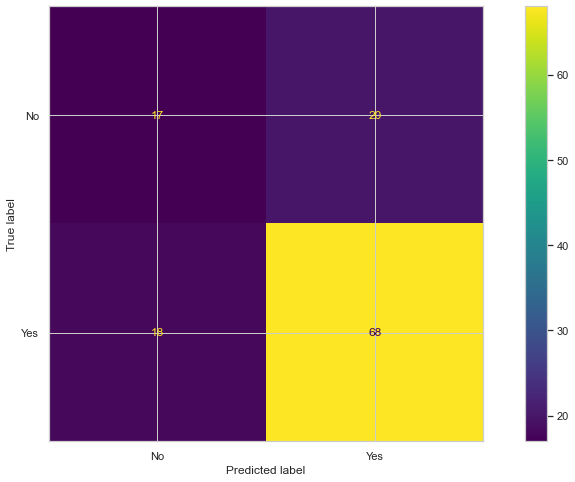

In [163]:
from sklearn.metrics import f1_score

plot_confusion_matrix(dt_simple, X_test, y_test, display_labels=["No","Yes"])  





#### Auc curve plotting

We will also compute the F1 score (for us it is a harmonic mean between the precision and the accurarcy)

Training Set Evaluation F1-Score=> 1.0
Test Set Evaluation F1-Score=> 0.7816091954022988


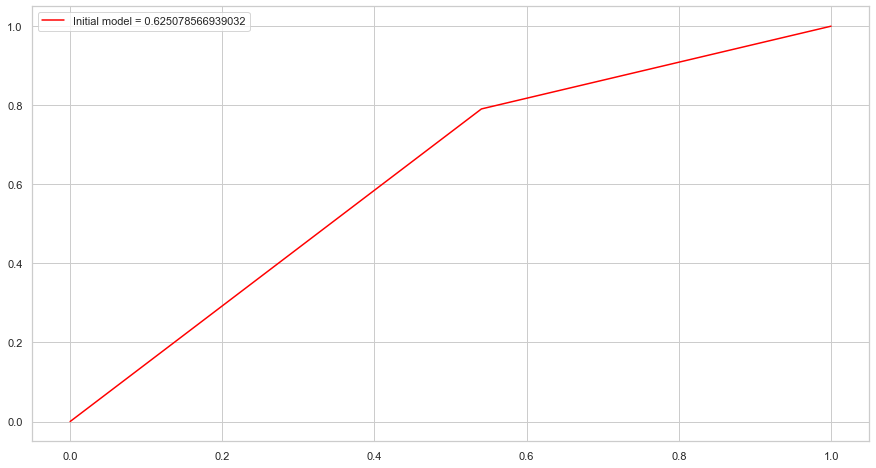

In [164]:
from sklearn import metrics
y_pred = dt_simple.predict(X_test)
y_pred_train = dt_simple.predict(X_train)

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred) 
plt.plot(fpr, tpr, color = 'Red', label = 'Initial model = '+str(auc))
plt.legend()
print('Training Set Evaluation F1-Score=>',f1_score(y_train,y_pred_train))

print('Test Set Evaluation F1-Score=>',f1_score(y_test,y_pred))
plt.show()



 An f1 score of 0.78 is not bad , but we have an f1 score of 1 in the training set which is very bad , there is quite a data overfitting

The initial tree had no parameters and it is straight to the point. Maybe we can imporve its accurarcy by tackling a few problems and improving some parameters

## Decision tree with Y imbalance consideration

In [165]:
### As said before, we have a problem of imbalance 

df.Loan_Status.value_counts()

1    421
0    192
Name: Loan_Status, dtype: int64

In [166]:
### Let's run our decision tree while fixing this imbalance problem

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

In [167]:
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

#### Checking whether the balance is fixed or not

In [168]:
y_train_resampled.value_counts()

0    335
1    335
Name: Loan_Status, dtype: int64

#### Running the DT with the new sampling

<function matplotlib.pyplot.show(close=None, block=None)>

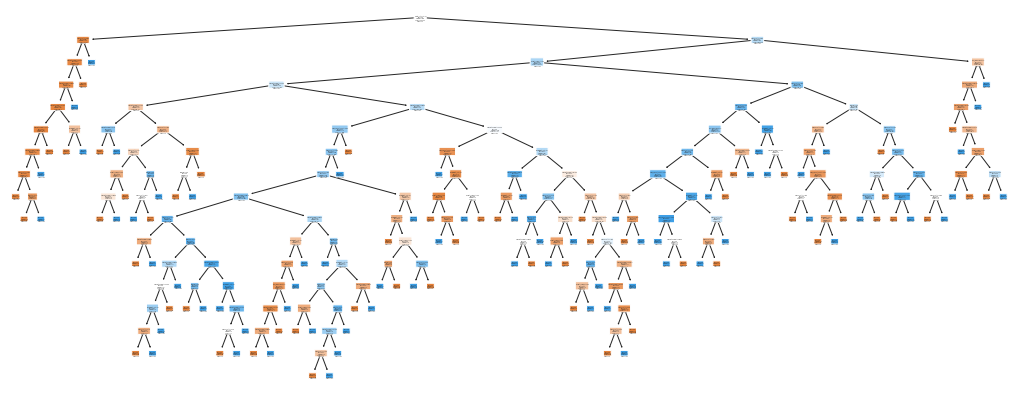

In [169]:

dt_oversample = DecisionTreeClassifier(random_state=42)
dt_oversample.fit(X_train_resampled, y_train_resampled)

### Plotting the tree

plt.figure(figsize=(18,7))
plot_tree(dt_oversample, feature_names=X_e.columns, class_names = ['No','Yes'], filled = True, rounded =  True)

plt.show

Still a huge tree , we still have a problem of overfitting, lets double check


#### Plotting the confusion matrixes

1- Training set

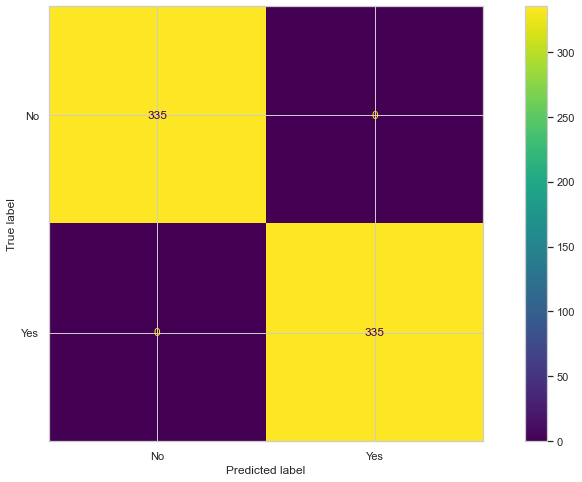

In [170]:

plot_confusion_matrix(dt_oversample, X_train_resampled, y_train_resampled, display_labels=["No","Yes"])  


2- test set

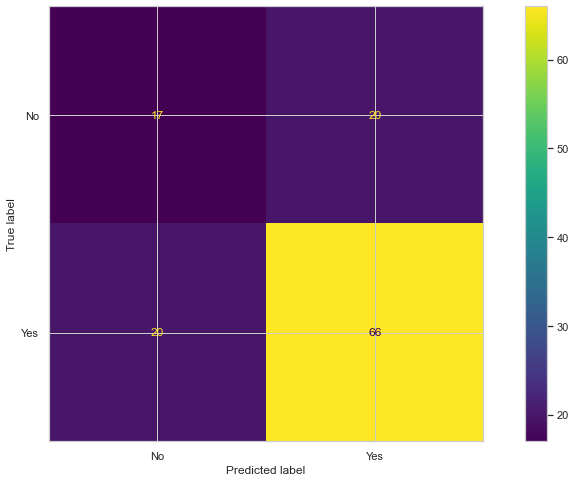

In [171]:

plot_confusion_matrix(dt_oversample, X_test, y_test, display_labels=["No","Yes"])  


Training Set Evaluation F1-Score=> 1.0
Test Set Evaluation F1-Score=> 0.7674418604651162


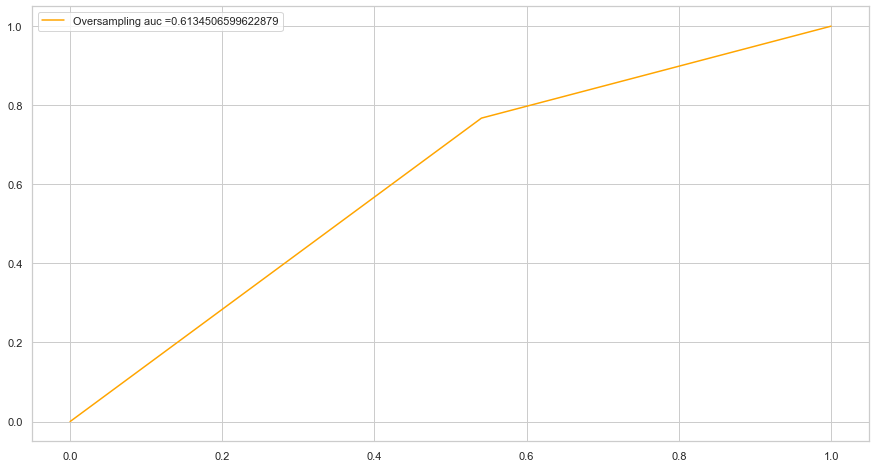

In [172]:
from sklearn import metrics
y_pred_oversample = dt_oversample.predict(X_test)
y_pred_oversample_train = dt_oversample.predict(X_train_resampled)

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_oversample)
auc = metrics.roc_auc_score(y_test, y_pred_oversample) 
plt.plot(fpr, tpr, color = 'Orange', label = 'Oversampling auc ='+str(auc))
plt.legend()

print('Training Set Evaluation F1-Score=>',f1_score(y_train_resampled,y_pred_oversample_train))

print('Test Set Evaluation F1-Score=>',f1_score(y_test,y_pred_oversample))

plt.show()

a 76% f1 score is not bad , there is a bit of a decrease but that was at the cost of fixing the oversampling which is worth it

However, Let's try to tweak it more perhaps we will witness better results



## Decision tree with oversampling + a tweak of the parameters (alpha )

#### Cost complexity pruning

In [173]:

alphas = dt_oversample.cost_complexity_pruning_path(X_train_resampled, y_train_resampled)

ccp_alphas = alphas.ccp_alphas[:-1] ## we dont care about last value because its root node

#### We got some alphas, now we will run some decision trees and store them

In [174]:
trees = []

for i in ccp_alphas:
    dt_ccp = DecisionTreeClassifier(random_state=0, ccp_alpha= i )
    y_pred = dt_ccp.fit(
        X_train_resampled, y_train_resampled)
    trees.append(dt_ccp)

#### For each tree plotted we will store the corresponding alphas

In [175]:


train_scores = []
test_scores = []

for x in trees:
    train_scores.append(x.score(X_train_resampled, y_train_resampled))
    test_scores.append(x.score(X_test,y_test))

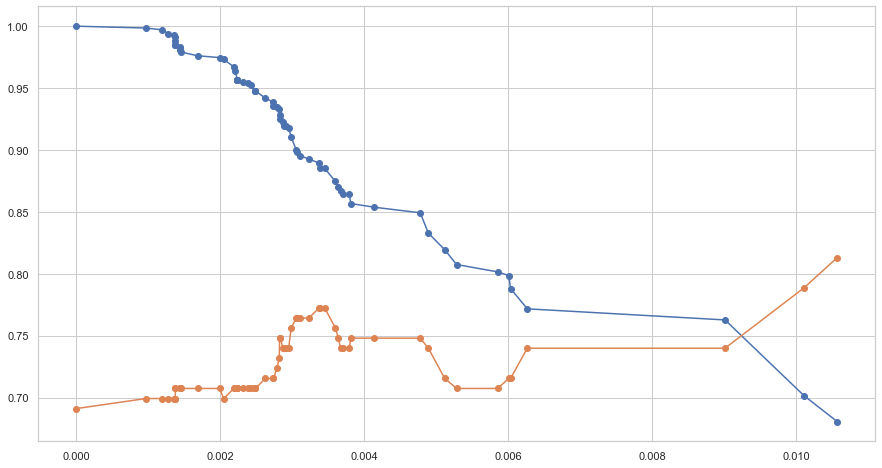

In [176]:
plt.plot(ccp_alphas, train_scores, label = 'training',marker = 'o')
plt.plot(ccp_alphas, test_scores, label = 'training',marker = 'o')

We have a match before the intersection in around alpha = 0.009 , in that area our data is not overfitted


#### Lets try to see which value is that alpha exactly

In [177]:


value_alpha = []
for i in ccp_alphas:
    if i > 0.008 and i < 0.01: ### We got the interval visually by observing the curve
        value_alpha.append(i)
value_alpha



[0.009008783832035995]

#### Alpha = 0.009008783832035995

Lets use it for corss validation and check if it is really the best alpha (because the alpha we got is only viable for this kind of split)

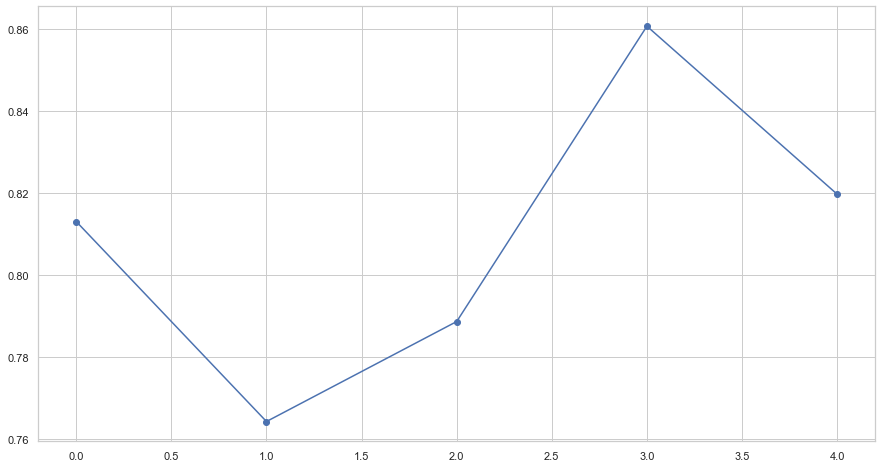

In [178]:
from sklearn.model_selection import cross_val_score


dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=0.009008783832035995)

scores = cross_val_score(dt_alpha, X_e, y, cv = 5)

plt.plot(range(0, 5), scores, marker = 'o')

We must compute the cv score for each alpha

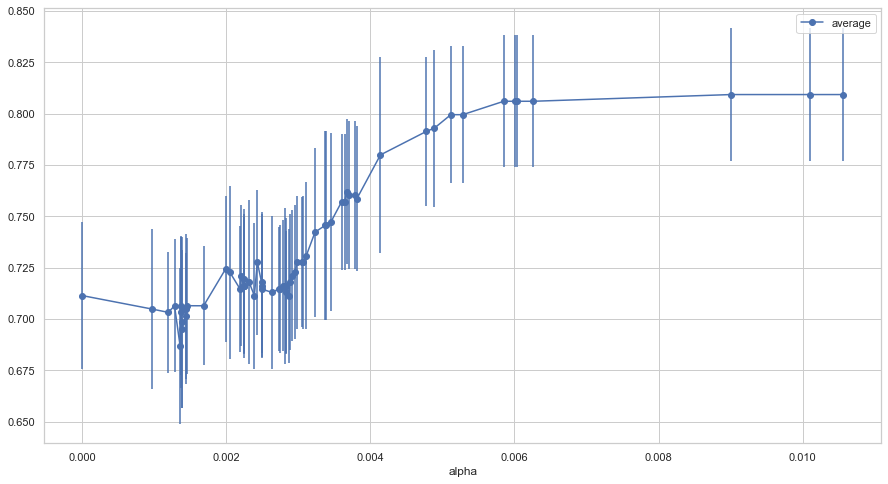

In [179]:
scores = []

for alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha = alpha)
    score = cross_val_score(dt, X_e, y, cv = 5)
    scores.append([alpha, score.mean(), score.std()])


## plot the scores

#### we will create a dataframe : 

df_alphas = pd.DataFrame(scores, columns=['alpha','average','std'])

df_alphas.head()

#### plotting

zplot = df_alphas.plot(x = 'alpha', y ='average', yerr= 'std', marker = 'o')

In [180]:
value_alpha_ideal = []
for i in ccp_alphas:
    if i > 0.008 and i < 0.01: ### Visually, our ideal alpha is the 3rd last point before reaching 0.006
        value_alpha_ideal.append(i)
value_alpha_ideal

[0.009008783832035995]

#### Our ideal alpha will be  = 0.009008783832035995 , lets now run the best decision tree

In [181]:
best_alpha = 0.009008783832035995

In [182]:
dt_best_alpha = DecisionTreeClassifier(ccp_alpha = best_alpha, random_state=42)

dt_best_alpha.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(ccp_alpha=0.009008783832035995, random_state=42)

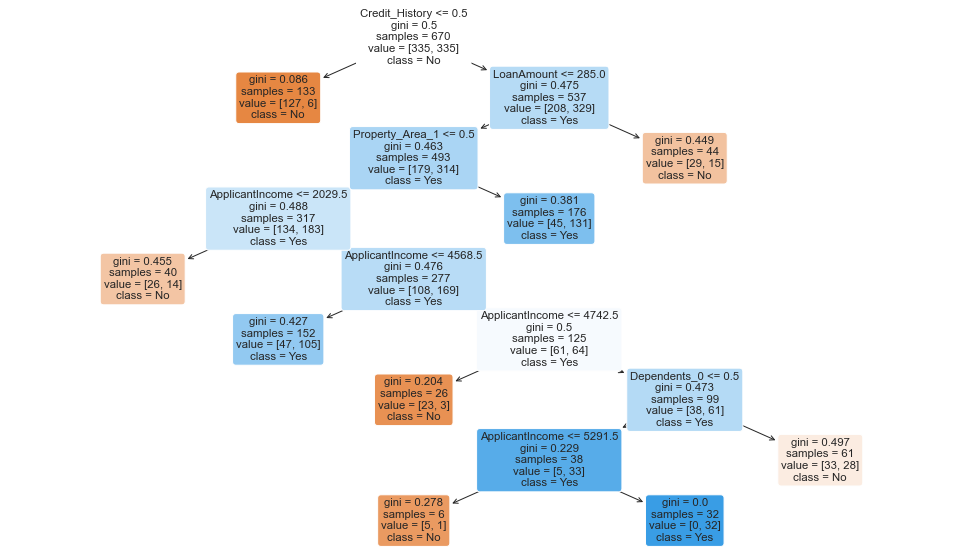

In [183]:
plt.figure(figsize=(17,10))
plot_tree(dt_best_alpha, feature_names=X_e.columns, class_names = ['No','Yes'], filled = True, rounded =  True)
plt.show()

Visually, it is much more improved, let's double check with numbers

#### Confusion matrixes


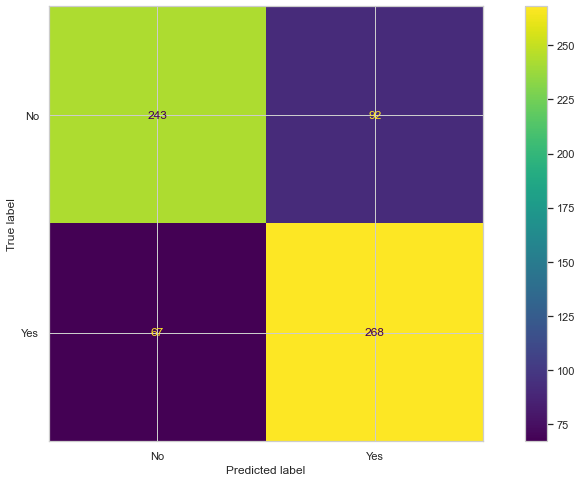

In [184]:

plot_confusion_matrix(dt_best_alpha, X_train_resampled, y_train_resampled, display_labels=["No","Yes"])  

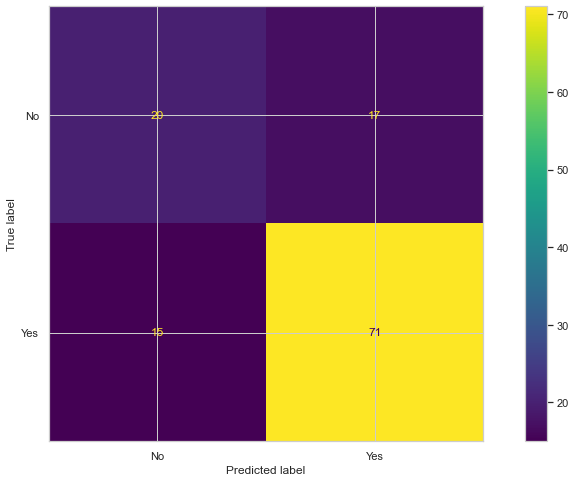

In [185]:
plot_confusion_matrix(dt_best_alpha, X_test, y_test, display_labels=["No","Yes"])  

Training Set Evaluation F1-Score=> 0.7712230215827338
Test Set Evaluation F1-Score=> 0.8160919540229885


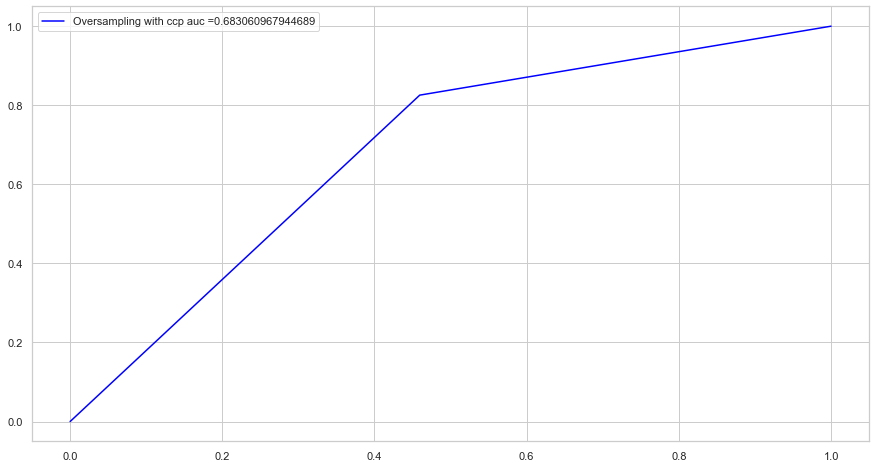

In [186]:

y_pred_ccp_ideal = dt_best_alpha.predict(X_test)
y_pred_ccp_ideal_train = dt_best_alpha.predict(X_train_resampled)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_ccp_ideal)
auc = metrics.roc_auc_score(y_test, y_pred_ccp_ideal) 
plt.plot(fpr, tpr, color = 'Blue', label = 'Oversampling with ccp auc ='+str(auc))
print('Training Set Evaluation F1-Score=>',f1_score(y_train_resampled,y_pred_ccp_ideal_train))

print('Test Set Evaluation F1-Score=>',f1_score(y_test,y_pred_ccp_ideal))
plt.legend()
plt.show()

An accuracy score of 0.81 is very good , especially when there is a small gap between the accuracy of the training and test set

And the AUC has much imrproved

#### We can't get a better decision tree than this, but we can use other complex models to achieve a better accurarcy


### Feature importance

What feature affect most our decision tree ?

<BarContainer object of 15 artists>

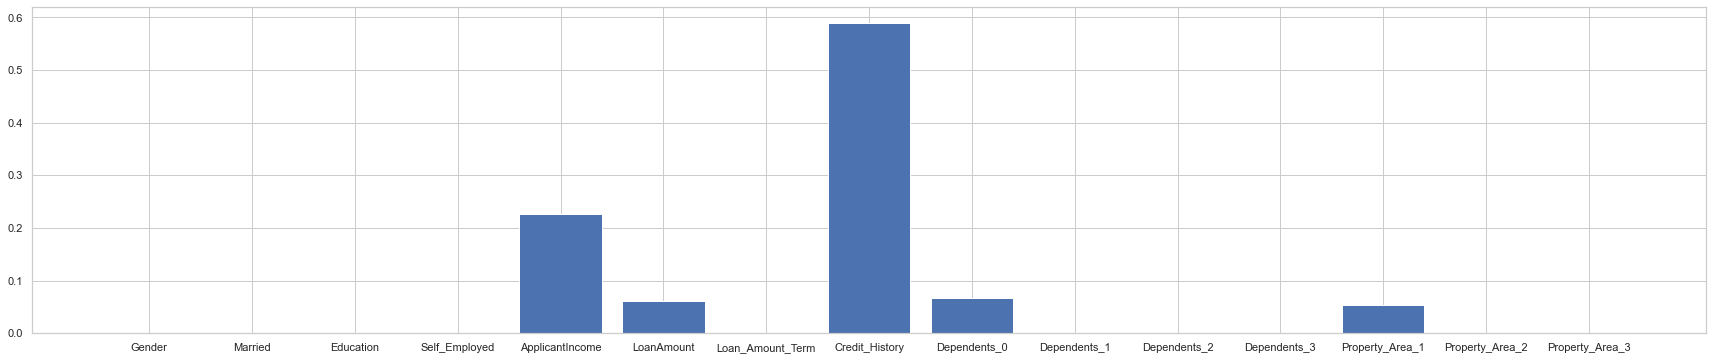

In [187]:
importance = dt_best_alpha.feature_importances_

plt.figure(figsize= (30, 6))
plt.bar(X_e.columns, importance)

The credit hisotry has the largest influence on our decision tree.

An honorable mention goes also to the ApplicantIncome


One the other hand, Married and Dependents (with 0 or 1 or no history) are omitted and not used in our decison tree

# Random forest classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier


#### Lets begin to tune hyperparameters

since we are in a random froest, lets tune the n_estimators

we will run different models and store their cross validation score

In [189]:
from sklearn.model_selection import cross_val_score

score_list = []  # We will put all the scores here
for i in range (200,300, 5): ### (200, 300, 5) are a result from trial and error 
    rf =  RandomForestClassifier(n_estimators= i, random_state=42)
    score = cross_val_score(rf, X_train_resampled, y_train_resampled, cv = 5)  ## cv = 5 is also with trial and error
    score_list.append([i, score.mean(), score.std()])

#### Lets plot those scores

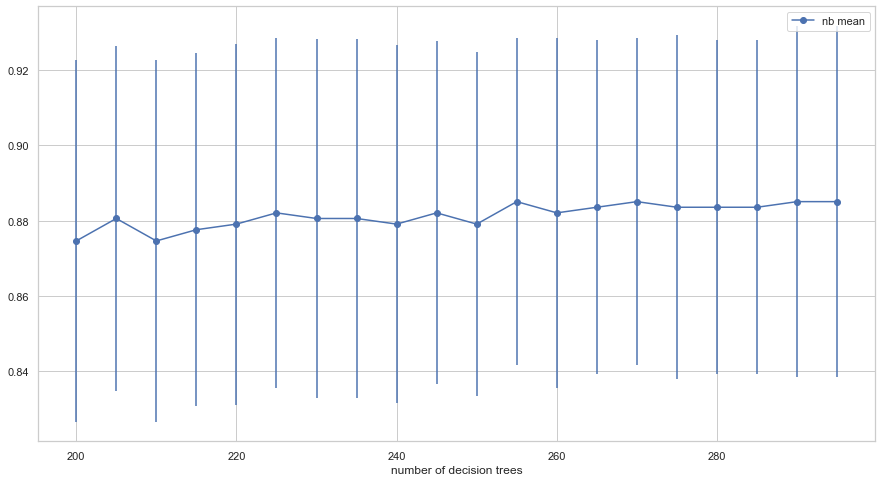

In [190]:
df_score_list = pd.DataFrame(score_list, columns=['number of decision trees','nb mean','nb std'])

socre_list_plot = df_score_list.plot(x = 'number of decision trees', y ='nb mean', yerr= 'nb std', marker = 'o')

According to the graph we pick 255 as the optimal n_estimators

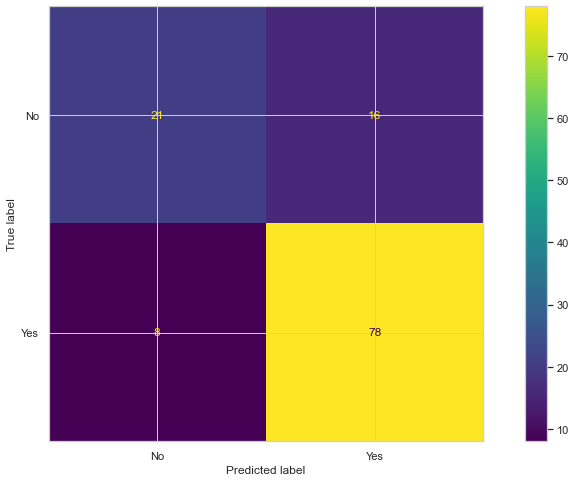

In [191]:
rf_ideal =  RandomForestClassifier(n_estimators= 255, random_state=42)

rf_ideal.fit(X_train_resampled, y_train_resampled)

plot_confusion_matrix(rf_ideal, X_test, y_test, display_labels = ["No","Yes"])

Training Set Evaluation F1-Score=> 1.0
Test Set Evaluation F1-Score=> 0.8666666666666666


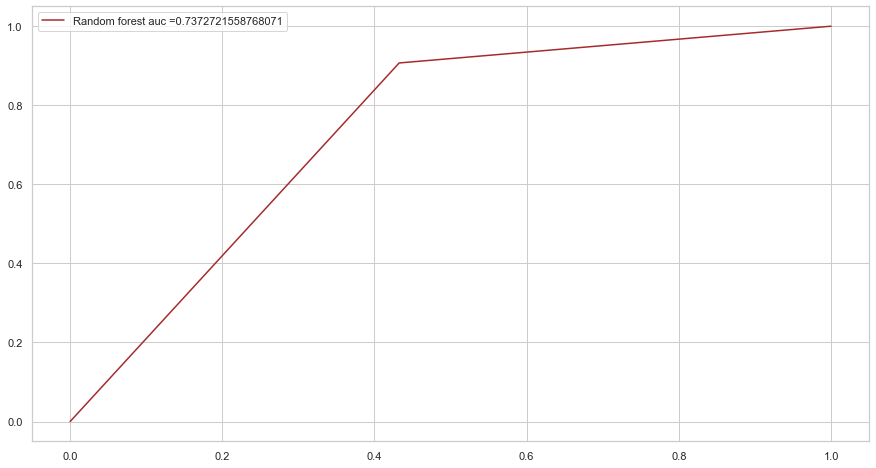

In [192]:

y_pred_rf = rf_ideal.predict(X_test)
y_pred_rf_train = rf_ideal.predict(X_train_resampled)

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf) 
plt.plot(fpr, tpr, color = 'brown', label = 'Random forest auc ='+str(auc))
plt.legend()

print('Training Set Evaluation F1-Score=>',f1_score(y_train_resampled,y_pred_rf_train))

print('Test Set Evaluation F1-Score=>',f1_score(y_test,y_pred_rf))

plt.show()

### Random forest classifier helped us a lot by improving our accuracy to 86%


a good thing about the random forest is that it chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features.

This graph will highlight it

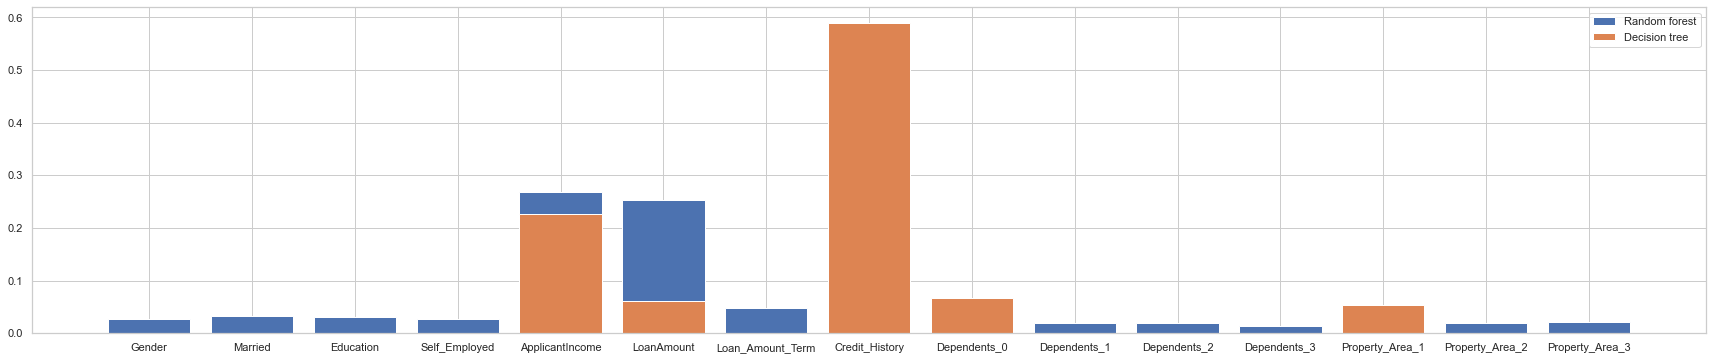

In [193]:
importance2 = rf_ideal.feature_importances_

plt.figure(figsize= (30, 6))
plt.bar(X_e.columns, importance2, label = 'Random forest')
plt.bar(X_e.columns, importance, label = 'Decision tree')
plt.legend()
plt.show()

# Adaboost model

adaboost generally gives a better accurarcy , let see if this is the case or not

In [194]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#### Launching the adaboost model


In [195]:
ada_b = AdaBoostClassifier(random_state= 42)

results = cross_val_score(ada_b, X_train, y_train, cv = 5, scoring='roc_auc') 
ada_b.fit(X_train_resampled, y_train_resampled)
print(results)

[0.69451131 0.67212325 0.75397208 0.69595571 0.67067886]


#### Lets use gridsearch to look for the best learning rate, and the best n_estimators

In [196]:
params = {'learning_rate': [0,36,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369], 'n_estimators' : range(100,300, 10)} 

## learning rate interval is with trial and error (we did from 0.01 to 0.5 we got 0.3 --> we did from 0.3 to 0.39 etc)

new_model = AdaBoostClassifier()
grid_search = GridSearchCV(new_model, params, scoring = 'roc_auc', cv = 5)
best_parameters = grid_search.fit(X_train_resampled, y_train_resampled)

In [197]:
best_parameters.best_estimator_

AdaBoostClassifier(learning_rate=0.368, n_estimators=290)

In [198]:
ada_best = AdaBoostClassifier(learning_rate=0.368, n_estimators=290)
ada_best.fit(X_train_resampled,y_train_resampled)

AdaBoostClassifier(learning_rate=0.368, n_estimators=290)

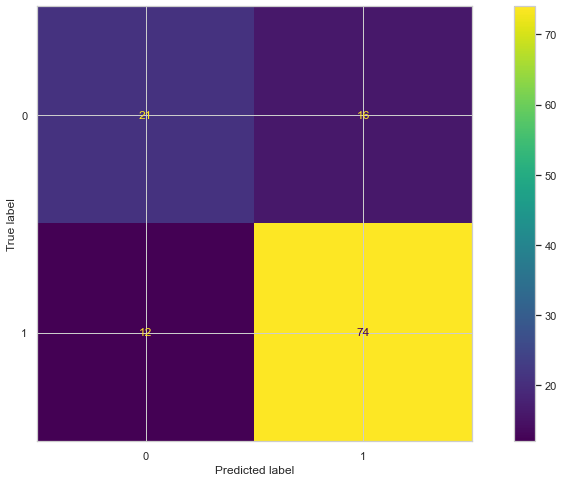

In [199]:
plot_confusion_matrix(ada_best, X_test, y_test)


Training Set Evaluation F1-Score=> 0.8467966573816156
Test Set Evaluation F1-Score=> 0.8409090909090908


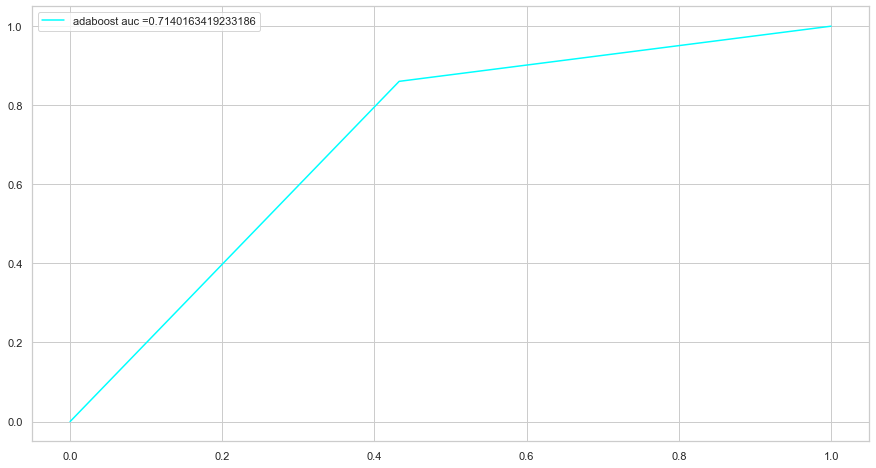

In [200]:

y_pred_ada = ada_best.predict(X_test)
y_pred_ada_train = ada_best.predict(X_train_resampled)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_ada)
auc = metrics.roc_auc_score(y_test, y_pred_ada) 
plt.plot(fpr, tpr, color = 'cyan', label = 'adaboost auc ='+str(auc))
plt.legend()

print('Training Set Evaluation F1-Score=>',f1_score(y_train_resampled,y_pred_ada_train))

print('Test Set Evaluation F1-Score=>',f1_score(y_test,y_pred_ada))

plt.show()

### We have an accurarcy of almost 84% which is acceptable 

But the random forest outperformed it by a 2% in terms of accuracy

# Neural Networks

Lets get away a bit from the decision trees , and see if we can achieve better accuracy with some deep learning models, including the neural networks




In [201]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

#### Lets do a neural network in where the activation function will vary


our activation function for the hidden layers are : relu

relu function : y(x) = max(0,x)

-----

Our activation function for the output layer is : sigmoid since we are classifying as 0 or 1

In [239]:

# Input neurons
input_neurons = X_train_resampled.shape[1]


# Output neurons (Since it is binary classification)
output_neurons = 1


# Defining hidden layers & neurons in each layersnumber_of_hidden_layers = 2
neuron_hidden_layer_1         = 10
neuron_hidden_layer_2         = 5


# Defining the architecture of the model
nn = Sequential()
nn.add(InputLayer(input_shape=(input_neurons)))
nn.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
nn.add(Dense(units=output_neurons, activation='sigmoid'))

In [240]:

nn.compile(loss='binary_crossentropy',optimizer="Adam",metrics=["accuracy",])

history = nn.fit(X_train_resampled, y_train_resampled, validation_data = (X_test, y_test), epochs = 10, batch_size= 1)

# Getting predictions for the test set
y_pred_nn = nn.predict(X_test)


# Getting accuracy score
from sklearn.metrics import accuracy_score

Epoch 1/10
670/670 [==============================] - 1s 987us/step - loss: 112.5405 - accuracy: 0.4851 - val_loss: 18.7449 - val_accuracy: 0.4715
Epoch 2/10
670/670 [==============================] - 1s 898us/step - loss: 10.4313 - accuracy: 0.5030 - val_loss: 165.6542 - val_accuracy: 0.3008
Epoch 3/10
670/670 [==============================] - 1s 915us/step - loss: 9.8755 - accuracy: 0.5194 - val_loss: 0.7245 - val_accuracy: 0.6585
Epoch 4/10
670/670 [==============================] - 1s 917us/step - loss: 12.7041 - accuracy: 0.5015 - val_loss: 14.4676 - val_accuracy: 0.3008
Epoch 5/10
670/670 [==============================] - 1s 971us/step - loss: 12.6139 - accuracy: 0.5209 - val_loss: 4.2986 - val_accuracy: 0.6992
Epoch 6/10
670/670 [==============================] - 1s 919us/step - loss: 6.6714 - accuracy: 0.5672 - val_loss: 5.1189 - val_accuracy: 0.4797
Epoch 7/10
670/670 [==============================] - 1s 944us/step - loss: 9.0201 - accuracy: 0.5269 - val_loss: 0.7019 - val_

In [241]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

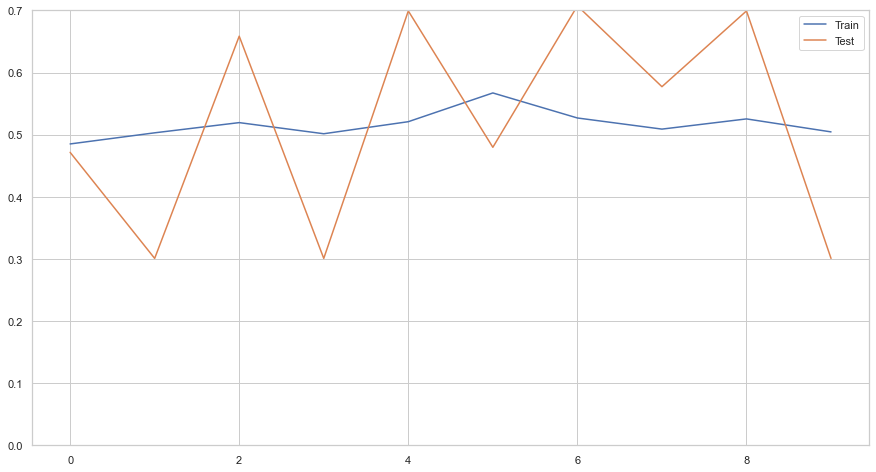

In [249]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.ylim(0, 0.7)
plt.legend()

plt.show

### Plotting AOC curve and the f1 score

Accuracy score for the test set = 0.47154471278190613
Accuracy score for the training set = 0.48507463932037354


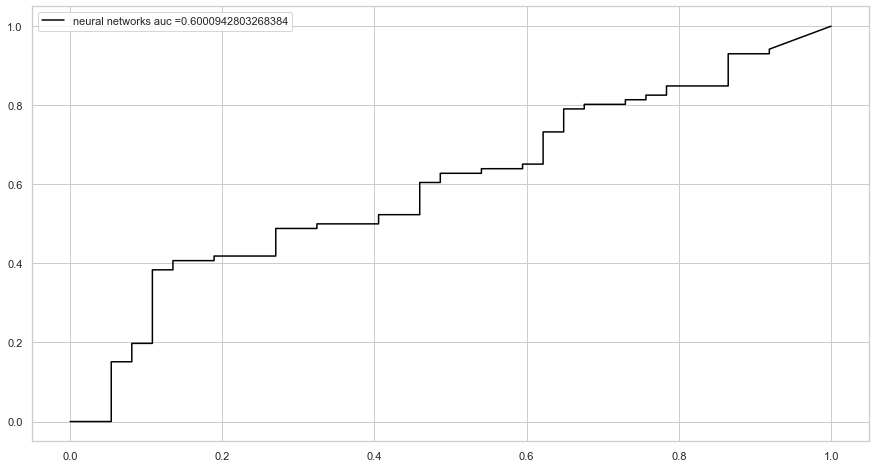

In [250]:
y_nn = nn.predict(X_test)
y_nn_train = nn.predict(X_train_resampled)

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_nn)
auc = metrics.roc_auc_score(y_test, y_nn) 
plt.plot(fpr, tpr, color = 'black', label = 'neural networks auc ='+str(auc))
plt.legend()

print('Accuracy score for the test set =', history.history['val_accuracy'][0])
print('Accuracy score for the training set =', history.history['accuracy'][0])
plt.show()

We got our auc + 60 and an accuracy = 48% 

Neural network is not suitable for our data ! 

# Visualizing all the AOC curves at once

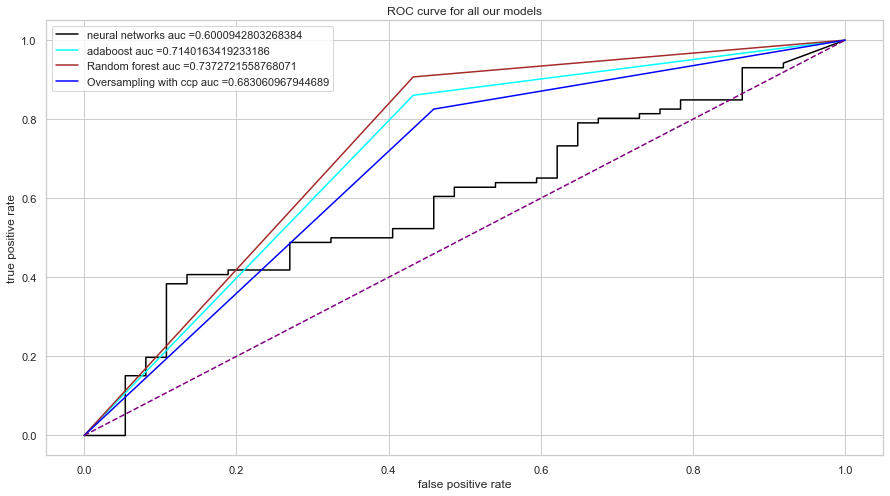

<Figure size 1080x576 with 0 Axes>

In [251]:
## Neural netowrks

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_nn)
auc = metrics.roc_auc_score(y_test, y_nn) 
plt.plot(fpr, tpr, color = 'black', label = 'neural networks auc ='+str(auc))

## Adaboost 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_ada)
auc = metrics.roc_auc_score(y_test, y_pred_ada) 
plt.plot(fpr, tpr, color = 'cyan', label = 'adaboost auc ='+str(auc))

## Random forest

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf) 
plt.plot(fpr, tpr, color = 'brown', label = 'Random forest auc ='+str(auc))

## Decision Tree 

fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_ccp_ideal)
auc = metrics.roc_auc_score(y_test, y_pred_ccp_ideal) 
plt.plot(fpr, tpr, color = 'Blue', label = 'Oversampling with ccp auc ='+str(auc))

## Threshhold

plt.plot([0,1], [0,1], color = 'purple', linestyle='--')

## Finishing touches

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve for all our models')
plt.legend()
plt.show()

plt.figure().savefig("foo.pdf", bbox_inches='tight')

Overall, the most performant model is the random forest model, it has a higher auc and the highest accuracy
